In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("results_ref.csv")
# df.tail()

In [21]:
# Filter by type
df_neu = df[df["type"] == "neumann"]
df_dirichlet = df[df["type"] == "dirichlet_semi"]
df_mie = df[df["type"] == "mie"]

In [22]:
def plot_timing_and_error(df, name="Dirichlet to Neumann", save_fig=False):
    """
    Erzeugt folgende Plots für ein gegebenes DataFrame:
    1) Zeit vs. Freiheitsgrade (ndof)
    2) Fehler vs. Freiheitsgrade (ndof)
    3) Zeit + Fehler kombiniert (zwei y-Achsen)
    4) Effizienzplot: Fehler vs. Zeit

    Parameter
    ---------
    df : DataFrame mit Spalten ["order", "ndof", "time", "err"]
    name : str, Bezeichnung (z.B. "Dirichlet" oder "Neumann")
    save_fig : bool, ob Plots als PNG gespeichert werden sollen
    """

    # Globale Marker und Farben (ggf. bei dir schon definiert)
    colors = ["red", "blue", "green", "orange", "red"]
    markers = ["x-", "v-", "*-", "*-", "x-"]

    if name == "Dirichlet to Neumann":
        figure_name = "laplace_DtN"
    elif name == "Neumann to Dirichlet":
        figure_name = "laplace_NtD"
    elif name == "Mie":
        figure_name = "maxwell_mie"
    else:
        figure_name = name.strip().lower()

    # --- Plot 1: Zeit vs. ndof ---
    plt.figure(figsize=(8, 6))
    for order in range(len(df["order"].unique())+1):
        df_plot = df[df["order"] == order]
        if df_plot.empty:
            continue
        plt.loglog(df_plot["ndof"], df_plot["time"], markers[order],
                   label=f'Order {order}', color=colors[order])

    plt.xlabel("Degrees of freedom [n]")
    plt.ylabel("Time [s]")
    plt.title(f"Timings: {name} Problem")
    plt.legend()
    plt.grid(True, which="both", ls="--")
    if save_fig:
        plt.savefig(f"{figure_name}_timings.png", dpi=300)
    plt.show()

    # --- Plot 2: Fehler vs. ndof ---
    plt.figure(figsize=(8, 6))
    for order in range(len(df["order"].unique())+1):
        df_plot = df[df["order"] == order]
        if df_plot.empty:
            continue
        plt.loglog(df_plot["ndof"], df_plot["err"], markers[order],
        label=f'Order {order}', color=colors[order])
        # Referenzkurve nahe an numerischen Daten platzieren
        scale = df_plot["err"].iloc[0]
        if name == "Neumann to Dirichlet":
            reforder = order
        elif name == "Dirichlet to Neumann":
            reforder = order 
        elif name == "Mie":
            reforder = order + 1
        else:
            reforder = order
        plt.loglog(df_plot["ndof"], scale*(df_plot["ndof"]/df_plot["ndof"].iloc[0])**-(reforder/2),
        '--', label=f'n^(-{reforder})', alpha=0.5, color=colors[order])
        
    plt.xlabel("Degrees of freedom [n]")
    if name == "Neumann to Dirichlet":
        plt.ylabel(r"$L_2$ error $|| \nabla (m - m_{ref})||$")
    elif name == "Dirichlet to Neumann": 
        plt.ylabel(r"$L_2$ error $|| j - j_{ref}||$")
    elif name == "Mie":
        plt.ylabel(r"$L_2$ error $|| \vec j - \vec j_{ref}||$")
    else:
        plt.ylabel(r"$L_2$ error||$")

        
    plt.title(f"Accuracy: Error {name} Problem")
    plt.legend()
    plt.grid(True, which="both", ls="--")
    if save_fig:
        plt.savefig(f"{figure_name}_accuracy.png", dpi=300)
    plt.show()

    # --- Plot 3: Zeit + Fehler kombiniert ---
    fig, ax1 = plt.subplots(figsize=(8, 6))
    for order in range(len(df["order"].unique())+1):
        df_plot = df[df["order"] == order]
        if df_plot.empty:
            continue
        ax1.loglog(df_plot["ndof"], df_plot["time"], markers[order],
                   label=f'Time (order {order})', color=colors[order])

    ax1.set_xlabel("Degrees of freedom [n]")
    ax1.set_ylabel("Time [s]", color="black")
    ax1.grid(True, which="both", ls="--")

    ax2 = ax1.twinx()
    for order in range(len(df["order"].unique())+1):
        df_plot = df[df["order"] == order]
        if df_plot.empty:
            continue
        ax2.bar(df_plot["ndof"]*(1+0.05*order), df_plot["err"],
                width=df_plot["ndof"]*0.05, alpha=0.3,
                color=colors[order], label=f'Error (order {order})')

    ax2.set_ylabel(r"$L_2$ error", color="black")

    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc="best")

    plt.title(f"Timing & Error {name} Problem")
    if save_fig:
        plt.savefig(f"{figure_name}_timing_and_error.png", dpi=300)
    plt.show()

    # --- Plot 4: Effizienzplot (Fehler vs. Zeit) ---
    plt.figure(figsize=(8, 6))
    for order in range(len(df["order"].unique())+1):
        df_plot = df[df["order"] == order]
        if df_plot.empty:
            continue
        plt.loglog(df_plot["time"], df_plot["err"], markers[order],
                   label=f'Order {order}', color=colors[order])

    plt.xlabel("Time [s]")
    if name == "Neumann to Dirichlet":
        plt.ylabel(r"$L_2$ error $|| \nabla (m - m_{ref})||$")
    elif name == "Dirichlet to Neumann": 
        plt.ylabel(r"$L_2$ error $|| j - j_{ref}||$")
    elif name == "Mie":
        plt.ylabel(r"$L_2$ error $|| \vec j - \vec j_{ref}||$")
    else:
        plt.ylabel(r"$L_2$ error||$")
     
    plt.title(f"Efficiency: {name} Problem")
    plt.legend()
    plt.grid(True, which="both", ls="--")
    if save_fig:
        plt.savefig(f"{figure_name}_efficiency.png", dpi=300)
    plt.show()


### Laplace Dirichlet to Neumann Problem

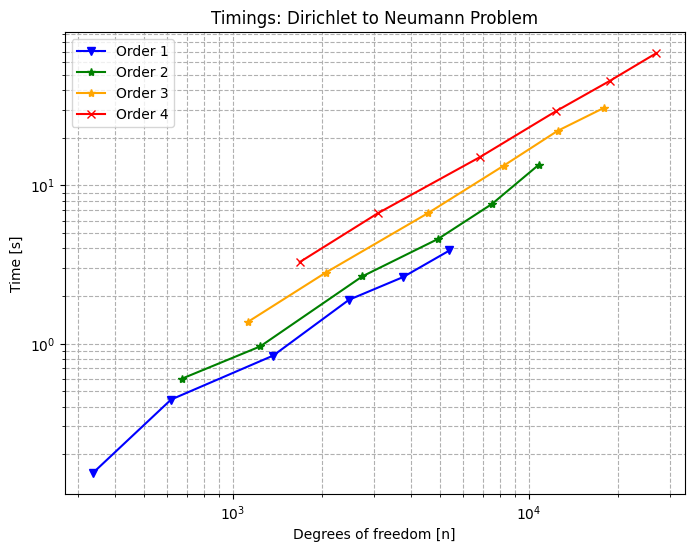

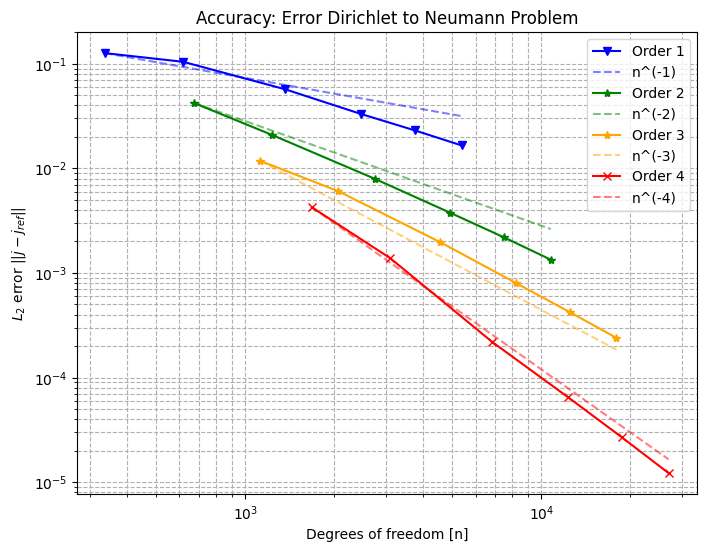

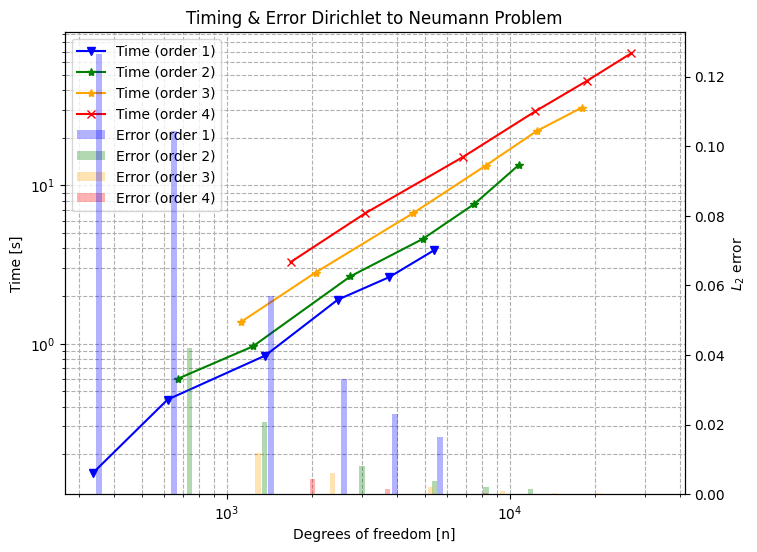

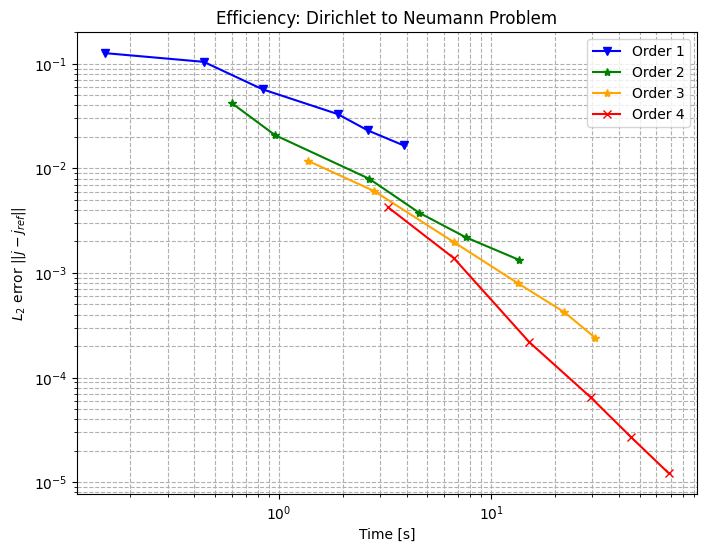

In [23]:
plot_timing_and_error(df_dirichlet, name="Dirichlet to Neumann", save_fig=True)

### Laplace Neumann to Dirichlet problem

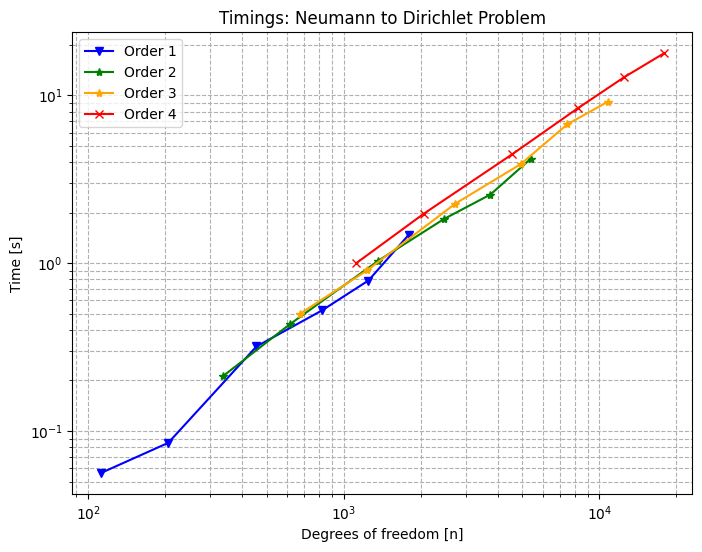

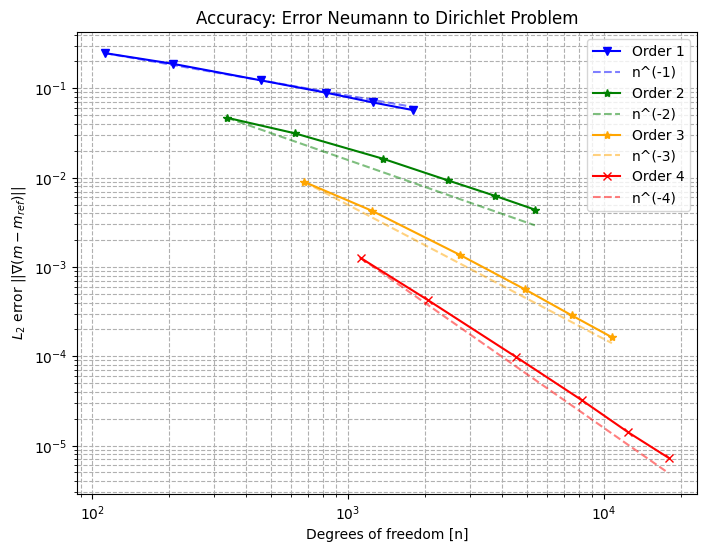

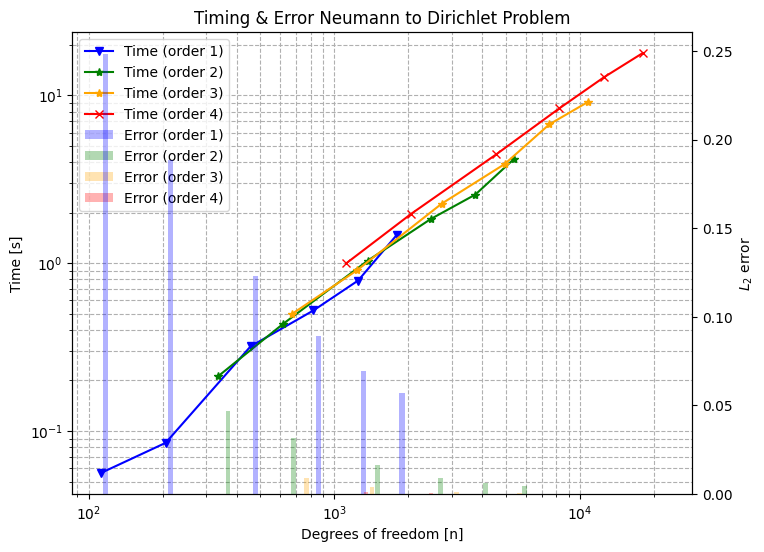

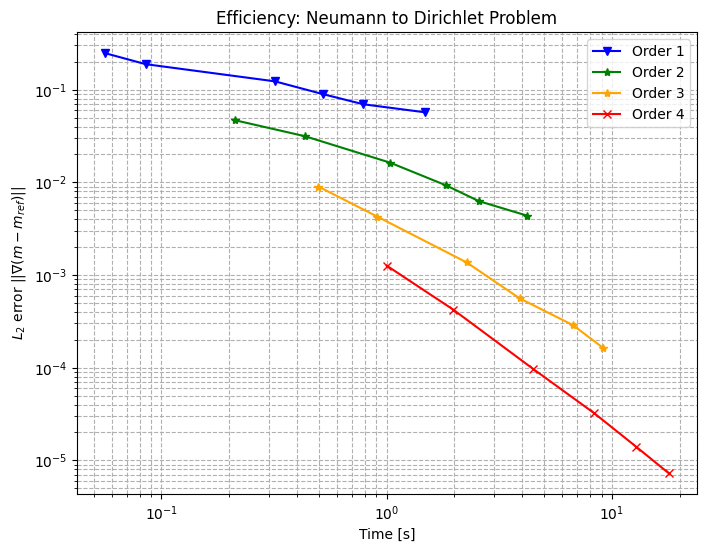

In [24]:
plot_timing_and_error(df_neu, name="Neumann to Dirichlet", save_fig=True)

### Maxwell Mie Scattering

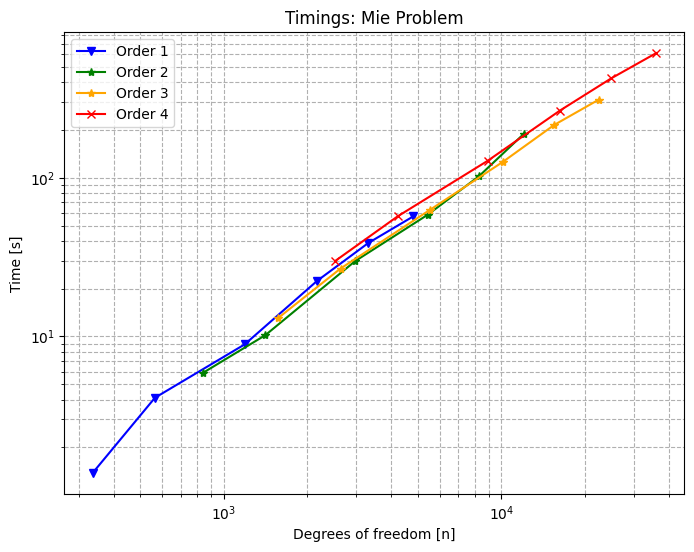

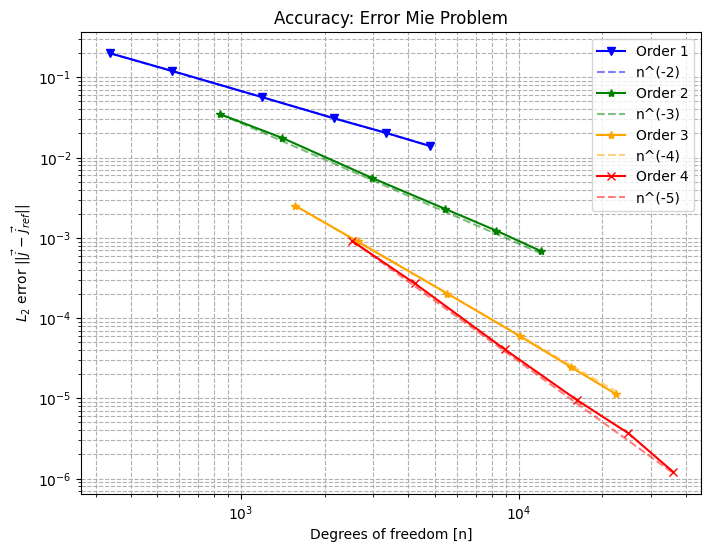

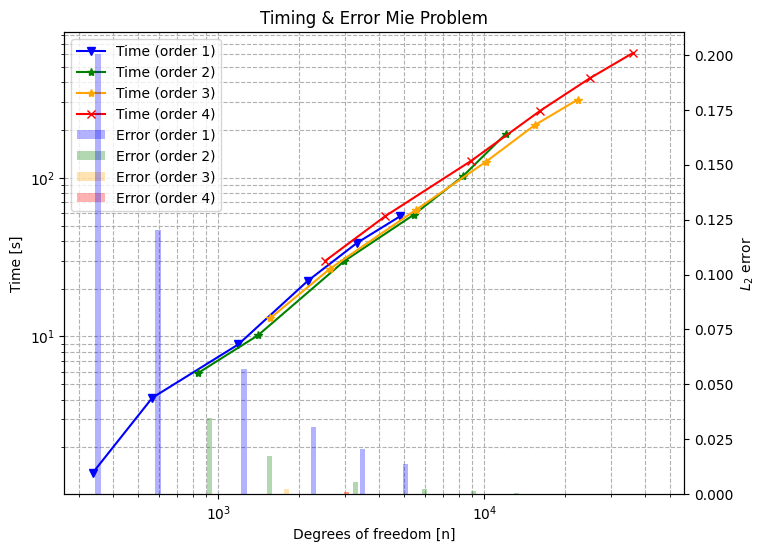

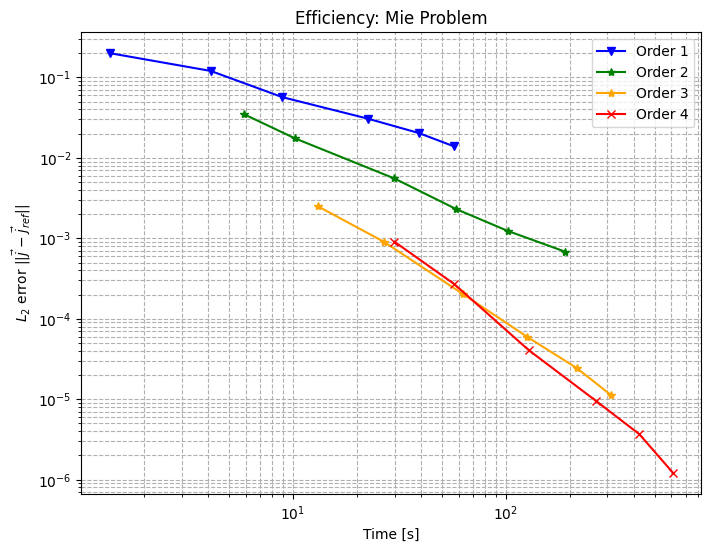

In [25]:
plot_timing_and_error(df_mie, name="Mie", save_fig=True)